<a href="https://colab.research.google.com/github/Kaushal28/ML/blob/master/Shape_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# %load C:\Users\Aspire5\Desktop\ML\Code\data_generator.py
import numpy as np
import matplotlib.pyplot as plt
import itertools
from random import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [0]:
class DataGenerator(object):

    def triangle_rect_images(self, number_of_images, image_size, save_as_image):
        img_size = image_size
        min_rect_size = 3
        max_rect_size = 10
        num_objects = 2

        if not save_as_image:
            data = []
            labels = []

        number_of_rects = number_of_images // 2
        number_of_triangles = number_of_images - number_of_rects
        for i_img in range(number_of_rects):
            imgs = np.zeros((img_size, img_size))
            width, height = np.random.randint(min_rect_size, max_rect_size, size=2)
            x = np.random.randint(0, img_size - width)
            y = np.random.randint(0, img_size - height)
            imgs[x:x+width, y:y+height] = 1.
            if not save_as_image:
                data.append(imgs.T.reshape(1, -1).tolist())
                labels.append(1) #denote rectangle as 1
            else:
                plt.imsave('square'+str(i_img)+'.jpeg', imgs.T)
        
        for i_img in range(number_of_triangles):
            imgs = np.zeros((img_size, img_size))
            size = np.random.randint(min_rect_size, max_rect_size)
            x, y = np.random.randint(0, img_size - size, size=2)
            mask = np.tril_indices(size)
            imgs[x + mask[0], y + mask[1]] = 1.
            if not save_as_image:
                data.append(imgs.T.reshape(1, -1).tolist())
                labels.append(0) #denote triangle as 0
            else:
                plt.imsave('triangle'+str(i_img)+'.jpeg', imgs.T)

        if not save_as_image:
            return data, labels

In [0]:
#generate images (array) of rectangle and triangle
image_size = 20
data_gen = DataGenerator()
X, y = data_gen.triangle_rect_images(100000, image_size, False)
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size = 0.33, random_state = 87)

In [0]:
def plot_images(X, y, image_size, number_of_images):
    if number_of_images%2 != 0:
        raise Exception('Number of images should be even')
    count = 0
    for a_single_image in X:
        if count >= number_of_images: break;
        plt.subplot(2, number_of_images // 2, count + 1)
        plt.title('Square' if y[count] == 1 else 'Triangle')
        plt.imshow(a_single_image.reshape(image_size, image_size), interpolation='none', origin='lower', extent=[0, image_size, 0, image_size])
        count += 1

    plt.tight_layout()
    plt.show()

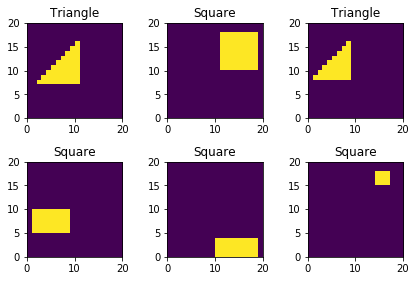

In [0]:
# plot first 6 images from traing data-set 
plot_images(X_train, y_train, image_size, 6)

In [0]:
# reshape the array of images
X_train = X_train.reshape(-1, image_size*image_size)
X_test = X_test.reshape(-1, image_size*image_size)

y_train_ = []
for y in y_train:
  if (y == 0):
    y_train_.append([1, 0])
  else:
    y_train_.append([0, 1]);
    
y_train = np.array(y_train_)
print (y_train[0])

[1 0]


In [0]:
# define a neural network to classify shapes
model = Sequential()
model.add(Dense(25, input_dim = 400, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=60, batch_size=10000)

Epoch 1/60
67000/67000 [==============================] - 1s 21us/step - loss: 0.6919 - acc: 0.5208
Epoch 2/60
67000/67000 [==============================] - 0s 6us/step - loss: 0.6791 - acc: 0.5743
Epoch 3/60
67000/67000 [==============================] - 0s 6us/step - loss: 0.6612 - acc: 0.6190
Epoch 4/60
67000/67000 [==============================] - 0s 6us/step - loss: 0.6351 - acc: 0.6651
Epoch 5/60
67000/67000 [==============================] - 0s 6us/step - loss: 0.6011 - acc: 0.7179
Epoch 6/60
67000/67000 [==============================] - 0s 6us/step - loss: 0.5618 - acc: 0.7547
Epoch 7/60
67000/67000 [==============================] - 0s 6us/step - loss: 0.5199 - acc: 0.7973
Epoch 8/60
67000/67000 [==============================] - 0s 5us/step - loss: 0.4759 - acc: 0.8301
Epoch 9/60
67000/67000 [==============================] - 0s 6us/step - loss: 0.4294 - acc: 0.8594
Epoch 10/60
67000/67000 [==============================] - 0s 6us/step - loss: 0.3815 - acc: 0.8875
Epoch 11

In [0]:
y_test_ = []
for y in y_test:
  if (y == 0):
    y_test_.append([1, 0])
  else:
    y_test_.append([0, 1]);
    
y_test = np.array(y_test_)

In [0]:
model.evaluate(X_test, y_test)

33000/33000 [==============================] - 1s 39us/step


[0.003400249002536646, 0.9994090909090909]